I am considering a square lattice (N1xN2) with 2 flavors and two spins with two conserved U(1)s per chain, so N_up and n_down are individually conserved per chain. If we only had total number and spin conservations the combinatorics would be

$$
\begin{pmatrix} 2N_1N_2 \\ n_\uparrow \end{pmatrix}\begin{pmatrix} 2N_1N_2 \\ n_\downarrow \end{pmatrix}
$$


If we have individual conservations per species:
$$
\prod_{\eta=1,2|s=\uparrow,\downarrow}\begin{pmatrix} N_1N_2 \\ n^\eta_s \end{pmatrix}
$$
--------------------------
To compare these two we consider the $\{n_s\}=(N_1 N_2,N_1 N_2)$ sector with the $\{n^\eta_s\}=(N_1 N_2/2,N_1 N_2/2,N_1 N_2/2,N_1 N_2/2)$ sector

In [1]:
from itertools import product
from math import comb
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def f1(N,N_up,N_down):
    return comb(int(2*N),N_up)*comb(int(2*N),N_down)
def f2(N,N_up_1,N_up_2,N_down_1,N_down_2):
    return comb(int(N),N_up_1)*comb(int(N),N_up_2)*comb(int(N),N_down_1)*comb(int(N),N_down_2)
N = 10
sum1 = 0
for n_up in range(0,2*N+1):
    for n_down in range(0,2*N+1):
        sum1+= f1(N,n_up,n_down)
sum2 = 0
for n_up_1 in range(0,N+1):
    for n_down_1 in range(0,N+1):
        for n_up_2 in range(0,N+1):
            for n_down_2 in range(0,N+1):
                sum2+= f2(N,n_up_1,n_down_1,n_up_2,n_down_2)
print(sum1/(16**(N)))
print(sum2/(16**(N)))


1.0
1.0


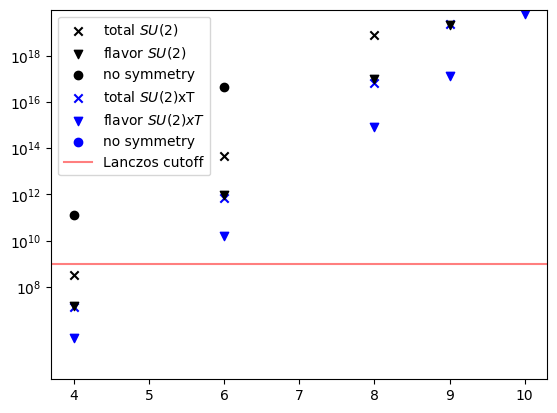

In [41]:
for N1N2 in np.array([4,6,8,9,10]):
    n_s = int(N1N2)
    n_eta_s = int(N1N2*0.5)
    comb1 = comb(int(2*N1N2),n_s)**2
    comb2 = comb(int(N1N2),n_eta_s)**4
    plt.scatter(N1N2,np.log(comb1/N1N2),marker='x',c='b')
    plt.scatter(N1N2,np.log(comb2/N1N2),marker='v',c='b')
    plt.scatter(N1N2,np.log(16**N1N2),marker='o',c='k')
    plt.scatter(N1N2,np.log(comb1),marker='x',c='k')
    plt.scatter(N1N2,np.log(comb2),marker='v',c='k')
plt.ylim([4,20])
plt.yticks([8,10,12,14,16,18],['$10^{8}$','$10^{10}$','$10^{12}$','$10^{14}$','$10^{16}$','$10^{18}$'])
plt.scatter(N1N2,1,marker='x',c='k',label='total $SU(2)$')
plt.scatter(N1N2,1,marker='v',c='k',label='flavor $SU(2)$')
plt.scatter(N1N2,1,marker='o',c='k',label='no symmetry')
plt.scatter(N1N2,1,marker='x',c='b',label='total $SU(2)$xT')
plt.scatter(N1N2,1,marker='v',c='b',label='flavor $SU(2)xT$')
plt.scatter(N1N2,1,marker='o',c='b',label='no symmetry')
plt.axhline(y=9,c='r',alpha=0.5,label='Lanczos cutoff')
plt.legend()

----------------------

Now consider the case where there's an $(n_\uparrow,n_\downarrow)$ conserved per chain:

$$
\prod_{s=\uparrow,\downarrow}\left( \prod_{i=1}^{L_1} \begin{pmatrix} L_2 \\ n_{i,1s} \end{pmatrix} \right) \times \left( \prod_{i=1}^{L_2} \begin{pmatrix} L_1 \\ n_{i,2s} \end{pmatrix} \right)
$$
where each sector is made up of the sets of coppupancies along each chain 
$$
\{\{n_{i,1\uparrow},n_{i,1\downarrow}\},\{n_{j,2\uparrow},n_{j,2\downarrow}\}\}
$$
with $i$ the chains hosting flav 1 electrons and $j$ the chains hosting flav 2 electrons. Each total symmetry sector has to satisfy
$$
\sum_i n_{i,1\uparrow} + n_{i,1\downarrow} = N_1 \\
\sum_i \frac{n_{i,1\uparrow} - n_{i,1\downarrow}}{2} = S^z_{1}\\
\sum_i n_{i,2\uparrow} + n_{i,2\downarrow} = N_2 \\
\sum_i \frac{n_{i,2\uparrow} - n_{i,2\downarrow}}{2} = S^z_{2}\\
N_1 + N_2 = N\\
S^z_1 + S^z_2 = S^z \\
$$

------------------------------

First we want to check that the hilbert space is summed correctly to $16^{N_1N_2}$ and then we want to see the gain we get by calculating the total number of sectors and the size of the largest sector.
-------------------------------
-------------------------------
1) Summing all symmetry sectors

In [91]:
#first we generate all partitions {n1,n2,....,nM} such that sum_i n_i = N
def partitions_summing_to(value, parts):
    if parts == 1:
        yield [value]
    else:
        for i in range(value + 1):
            for rest in partitions_summing_to(value - i, parts - 1):
                yield [i] + rest
####################
def partitions(value,parts,max):
    """
    Generate all ways to partition value into parts non-negative integers,
    then filter out any partitions where any entry exceeds max.
    """
    def helper(remaining, parts_left):
        # Base case: If no parts left to fill
        if parts_left == 0:
            if remaining == 0:
                yield []
            return

        # Generate partitions
        for i in range(remaining + 1):  # Allow any non-negative integer
            for rest in helper(remaining - i, parts_left - 1):
                yield [i] + rest

    # Generate all partitions
    all_partitions = list(helper(value,parts))

    # Filter out partitions with any entry > L2
    filtered_partitions = [p for p in all_partitions if all(x <= max for x in p)]

    return filtered_partitions
########################
# now i want to create one aprtition per spin/flavor and then create a combined partition
########################
def partition_products(N_up, N_down, L1, L2, target_sum, target_diff):
    """
    Generate products of partitions and filter based on specific sum and difference conditions.
    """
    # Generate partitions for N_up and N_down
    partitions_up = partitions(N_up,L1,L2)
    partitions_down = partitions(N_down, L1, L2)
    # Create the Cartesian product of partitions
    filtered_results = []
    for up, down in product(partitions_up, partitions_down):
        # Calculate sum and difference for each pair of partitions
        total_sum = sum(up) + sum(down)
        total_diff = sum(up) - sum(down)

        # Check if conditions are met
        if total_sum == target_sum and total_diff == target_diff:
            filtered_results.append((up, down))

    return filtered_results
########################################
#step1: generate all partitions (N_1_up,N_1_down,N_2_up,N_2_down) consistent with  (N_Tot,S_Tot)
N = 9
S = 0
L1 = 4
L2 = 4
parts= partitions(N,4,max=N)
filtered_parts = []
for p in parts:
    if np.sum(p[::2]) - np.sum(p[1::2]) == 2*S:
        filtered_parts.append(p)
################################
#so filtered_parts has all the combinations of (N_1_up,N_1_down,N_2_up,N_2_down) compatible with total N,S.count
#Then, extract (N_1_up,N_1_down,N_2_up,N_2_down) and calculate further partitions into the individual chain numbers



In [140]:
def func1(p,L1,L2):
    '''
    Given a partition p as a list calculate a function associated with the partition
    '''
    f = 1
    if len(p) != L1:
        print('ERRRRRRRROR')
        quit()
    for pi in p:
        f *= comb(L2,pi)
    return f
def func2(p,L1,L2):
    '''
    Given a partition p as a list calculate a function associated with the partition
    '''
    f = 1
    if len(p) != L2:
        print('ERRRRRRRROR')
        quit()
    for pi in p:
        f *= comb(L1,pi)
    return f
def totalpartitions(N_1_up,N_1_down,N_2_up,N_2_down,L1,L2):
    '''
    0 =< N_i_j =< L1*L2
    all combos are possible... 
    xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
    N_TOT = N_1_up + N_1_down + N_2_up + N_2_down
    S_TOT = 0.5*(N_1_up - N_1_down + N_2_up -N_2_down)
    '''
    #generate partitions of each section and combine them in the end
    n_1_up = partitions(value = N_1_up,parts = L1,max = L2)
    n_1_down = partitions(value = N_1_down,parts = L1,max = L2)
    n_2_up = partitions(value = N_2_up,parts = L2,max = L1)
    n_2_down = partitions(value = N_2_down,parts = L2,max = L1)
    n_1_up_combinations = {tuple(p): func1(p,L1,L2) for p in n_1_up}
    n_1_down_combinations = {tuple(p): func1(p,L1,L2) for p in n_1_down}
    n_2_up_combinations = {tuple(p): func2(p,L1,L2) for p in n_2_up}
    n_2_down_combinations = {tuple(p): func2(p,L1,L2) for p in n_2_down}
    #partitions_final = product(n_1_up,n_1_down,n_2_up,n_2_down)

    combined_results = {}
    for x,y,z,w in product(n_1_up,n_1_down,n_2_up,n_2_down):
        key = (tuple(x), tuple(y),tuple(z),tuple(w))
        combined_results[key] = n_1_up_combinations[tuple(x)]*n_1_down_combinations[tuple(y)]*n_2_up_combinations[tuple(z)]*n_2_down_combinations[tuple(w)]
    
    return sum(combined_results.values()),len(combined_results),max(combined_results.values())

In [141]:
N = 4 # system size is 3x3
sum1 = 0
sector_num= 0
max_sec = 0
for n_up_1 in range(0,N+1):
    for n_down_1 in range(0,N+1):
        for n_up_2 in range(0,N+1):
            for n_down_2 in range(0,N+1):
                s,l,m = totalpartitions(n_up_1,n_down_1,n_up_2,n_down_2,2,2)
                sum1+= s
                sector_num += l
                if m > max_sec:
                    max_sec = m
print(sum1/(16**(N)))
print(sector_num)
print(max_sec)
print((16**(N)))

1.0
6561
256
65536


In [143]:
def max_sector(N):
    if N%3 == 0:
        L1 = 3
        L2 = int(N/3)
    elif N % 2 == 0:
        L1 = 2
        L2 = int(N/2)
    print(L1,L2)
    sum1 = 0
    sector_num= 0
    max_sec = 0
    for n_up_1 in range(0,N+1):
        for n_down_1 in range(0,N+1):
            for n_up_2 in range(0,N+1):
                for n_down_2 in range(0,N+1):
                    s,l,m = totalpartitions(n_up_1,n_down_1,n_up_2,n_down_2,L1,L2)
                    sum1+= s
                    sector_num += l
                    if m > max_sec:
                        max_sec = m
    return max_sec   

In [144]:
from math import log10

2) Gain by exploiting the symmetries

2 2
3 2
2 4
3 3
2 5
3 4


KeyboardInterrupt: 

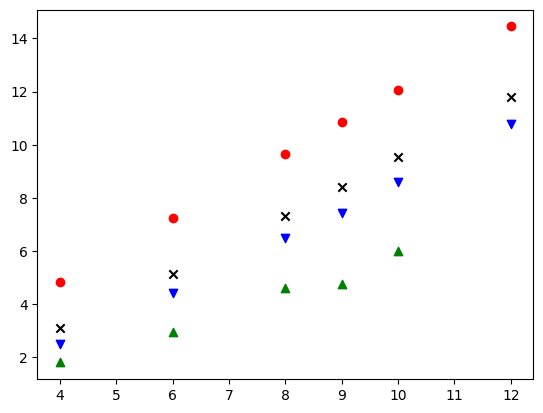

In [149]:
for N1N2 in np.array([4,6,8,9,10,12]):
    n_s = int(N1N2)
    n_eta_s = int(N1N2*0.5)
    comb1 = comb(int(2*N1N2),n_s)**2
    comb2 = comb(int(N1N2),n_eta_s)**4
    plt.scatter(N1N2,log10(comb1/N1N2),marker='x',c='black')
    plt.scatter(N1N2,log10(comb2/N1N2),marker='v',c='blue')
    plt.scatter(N1N2,log10(16**N1N2),marker='o',c='red')
    plt.scatter(N1N2,log10(max_sector(N1N2)/N1N2),marker='^',c='green')
plt.ylim([2,20])
plt.yticks([4,6,8,10,12,14,16],['$10^{4}$','$10^{6}$','$10^{8}$','$10^{10}$','$10^{12}$','$10^{14}$','$10^{16}$'])
plt.scatter(N1N2,1,marker='x',c='black',label='total $SU(2)\\times T$')
plt.scatter(N1N2,1,marker='v',c='blue',label='flavor $SU(2)\\times T$')
plt.scatter(N1N2,1,marker='o',c='red',label='no symmetry')
plt.scatter(N1N2,1,marker='^',c='green',label='full internal $\\times T$')
plt.axhline(y=9,c='r',alpha=0.5,label='~ Lanczos cutoff')
plt.legend()